<a href="https://colab.research.google.com/github/PritamKhan/Data_Analytics/blob/master/Assignment_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Theoretical



1. What is a Decision Tree, and how does it work?
-> A Decision Tree is a flowchart-like model used for classification or regression. It splits data into branches based on feature values, making decisions at each node until a final prediction is made at the leaf node.



2. What are impurity measures in Decision Trees?
-> Impurity measures are metrics used to determine how mixed the classes are in a node. They help decide the best feature to split the data. Lower impurity means the data is more "pure" (i.e., mostly one class).



3. What is the mathematical formula for Gini Impurity?
->
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

Where $p_i$ is the probability of class $i$ in the node.


4. What is the mathematical formula for Entropy?
->
$$
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where $p_i$ is the probability of class $i$ in the node.



5. What is Information Gain, and how is it used in Decision Trees?
-> Information Gain is the reduction in impurity after a split. It's calculated as:

$$
Information\ Gain = Entropy_{parent} - \sum \left( \frac{n_i}{n} \times Entropy_i \right)
$$

The feature with the highest Information Gain is selected for splitting.



6. What is the difference between Gini Impurity and Entropy?
-> Both measure impurity, but Gini is faster to compute and often used by default. Entropy involves logarithms and is slightly more computationally expensive. Results are usually similar.



7. What is the mathematical explanation behind Decision Trees?
-> A Decision Tree uses a greedy algorithm to recursively split the dataset based on the feature that provides the best impurity reduction (like Gini or Entropy). This forms a tree structure with internal nodes (splits) and leaf nodes (outputs).



8. What is Pre-Pruning in Decision Trees?
-> Pre-Pruning stops the tree from growing when a condition is met (like max depth or minimum samples). It prevents the model from overfitting by limiting complexity during training.



9. What is Post-Pruning in Decision Trees?
-> Post-Pruning allows the tree to grow fully, then trims back some branches based on performance on validation data to reduce overfitting and improve generalization.



10. What is the difference between Pre-Pruning and Post-Pruning?
->
* Pre-Pruning: Stops tree early during training.
* Post-Pruning: Grows full tree, then prunes it back.
  Post-pruning often gives better results but is more computationally expensive.



11. What is a Decision Tree Regressor?
-> A Decision Tree Regressor predicts continuous numeric values instead of classes. It splits data to minimize the variance (or mean squared error) in the target values.



12. What are the advantages and disadvantages of Decision Trees?
-> Advantages:

* Easy to understand and visualize
* Handles both numerical and categorical data
* Requires little data preparation

Disadvantages:

* Prone to overfitting
* Can be unstable with small changes in data
* Greedy nature may not find global optimum



13. How does a Decision Tree handle missing values?
-> Some implementations handle missing values by:

* Splitting based on available features
* Using surrogate splits (alternative splits)
* Assigning samples probabilistically across branches



14. How does a Decision Tree handle categorical features?
-> Categorical features can be directly used by splitting based on each category or grouping them. Most libraries (like scikit-learn) handle this automatically after encoding.



15. What are some real-world applications of Decision Trees?
->
* Medical diagnosis
* Customer churn prediction
* Credit risk assessment
* Fraud detection
* Loan approval
* Marketing segmentation




###Practical

In [ ]:
# 16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 1.0


In [ ]:
# 17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances


clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


In [ ]:
# 18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 1.0


In [ ]:
# 19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)


from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))

MSE: 0.495235205629094


In [ ]:
# 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # <-- Discrete class labels (0, 1, 2)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Export the tree to DOT format and visualize using graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=True)

'iris_tree.png'

In [8]:
# 21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree


clf_shallow = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
clf_full = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("Shallow Tree Accuracy:", accuracy_score(y_test, clf_shallow.predict(X_test)))
print("Full Tree Accuracy:", accuracy_score(y_test, clf_full.predict(X_test)))

Shallow Tree Accuracy: 1.0
Full Tree Accuracy: 1.0


In [9]:
# 22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree


clf_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42).fit(X_train, y_train)
clf_default = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("min_samples_split=5 Accuracy:", accuracy_score(y_test, clf_custom.predict(X_test)))
print("Default Tree Accuracy:", accuracy_score(y_test, clf_default.predict(X_test)))

min_samples_split=5 Accuracy: 1.0
Default Tree Accuracy: 1.0


In [10]:
# 23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, iris.target, test_size=0.2, random_state=42)

clf_scaled = DecisionTreeClassifier(random_state=42).fit(X_train_s, y_train_s)
clf_unscaled = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("With Scaling Accuracy:", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))
print("Without Scaling Accuracy:", accuracy_score(y_test, clf_unscaled.predict(X_test)))

With Scaling Accuracy: 1.0
Without Scaling Accuracy: 1.0


In [11]:
# 24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification


from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))

OvR Accuracy: 1.0


In [12]:
# 25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores


clf.fit(X_train, y_train)
importances = clf.feature_importances_

for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.4f}")

sepal length (cm): 0.0179
sepal width (cm): 0.0179
petal length (cm): 0.3979
petal width (cm): 0.5663


In [14]:
# 26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree


reg_restricted = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
reg_unrestricted = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

print("Restricted Tree MSE:", mean_squared_error(y_test, reg_restricted.predict(X_test)))
print("Unrestricted Tree MSE:", mean_squared_error(y_test, reg_unrestricted.predict(X_test)))

Restricted Tree MSE: 0.0
Unrestricted Tree MSE: 0.0


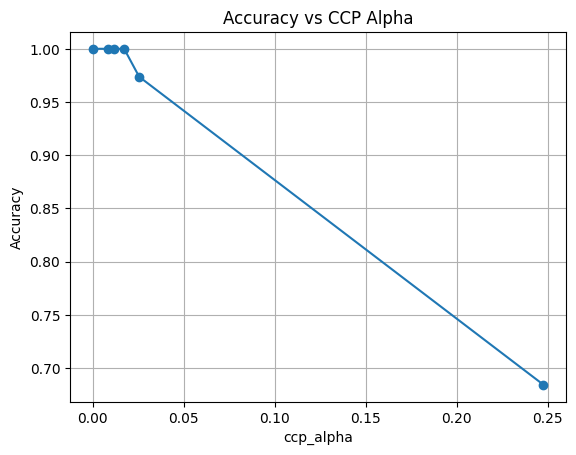

In [17]:
# 27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

accs = []
for alpha in ccp_alphas:
    pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, pruned.predict(X_test)))

import matplotlib.pyplot as plt
plt.plot(ccp_alphas, accs, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()

In [18]:
# 28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score


from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


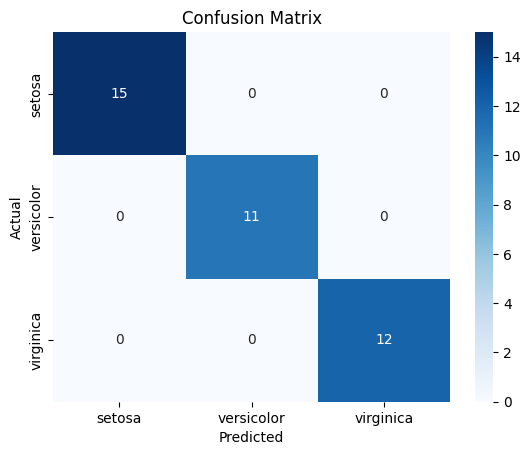

In [19]:
# 29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn


from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# 30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split


from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 0.9367588932806324
